# Блок 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x: 7 6 5 4 3 2
n: 1 2 4 4 5 6


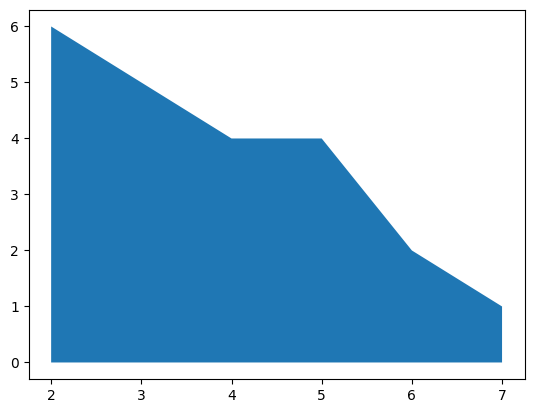

In [3]:
#1

raw = [3, 2, 5, 4, 6, 5, 3, 2, 4, 3, 4, 2, 3, 2, 5, 2, 3, 4, 2, 5, 7, 6]
raw.sort()

seth = list(set(raw))
cooked = [(seth[i], raw.count(seth[i])) for i in range(len(seth))]

xs = [cooked[i][0] for i in range(len(seth))]
ns = [cooked[i][1] for i in range(len(seth))]

print("x:", *xs[::-1])
print("n:", *ns[::-1])

poly = plt.Polygon(cooked + [(len(seth)+1, 0), (2,0)])

fig, ax = plt.subplots()
ax.add_patch(poly)
ax.autoscale()
plt.show()

In [4]:
#2

raw = [7.0, 6.0, 5.9, 9.4, 6.5, 7.3, 7.6, 9.3, 5.8, 7.2] +\
      [7.1, 8.3, 7.5, 6.8, 7.1, 9.2, 6.1, 8.5, 7.4, 7.8] +\
      [10.2, 9.4, 8.8, 8.3, 7.9, 9.2, 8.9, 9.0, 8.7, 8.5]

n = len(raw)
k = int(1 + 3.222*np.log10(n) + 1)
r = round(max(raw) - min(raw), 1)
h = round(r/k, 2)

def IVR(raw_, n_, h_):
    raw_.sort()

    border = round(min(raw_) + h_, 1)
    IVR = [(min(raw_), border)]

    while round(border, 1) < max(raw_):
        IVR += [(round(border, 1), round(border + h_, 1))]
        border = (border + h_)

    for i in range(len(IVR)):
        count = 0
        for j in range(n_):
            if IVR[i][0] <= raw_[j] <= IVR[i][1]: count+=1
        print("["+str(IVR[i])[1:], count)

IVR(raw, n, h)

# raw


[5.8, 6.5) 5
[6.5, 7.2) 6
[7.2, 8.0) 7
[8.0, 8.7) 5
[8.7, 9.4) 9
[9.4, 10.2) 3


In [5]:
#3

raw = [99.2, 101.2, 99.3, 105.0, 97.3, 103.2, 105.4, 108.2] +\
      [95.4,  96.8, 100.5, 90.3, 110.8, 111.5, 150.5, 140.3] +\
      [89.8, 103.6, 115.8, 125.4, 116.5, 130.4, 90.6, 130.4] +\
      [170.4, 109.2, 160.3, 122.4, 190.3, 202.0, 130.0, 119.6] +\
      [99.9, 119.4, 127.0, 130.0, 140.0, 129.0, 150.0, 168.0]

n = len(raw)
k = 4 #int(1 + 3.222*np.log10(n) + 1)
r = max(raw) - min(raw)
h = r/k

IVR(raw, n, h)
print()
cooked = list(filter(lambda x: not(x<100), raw))

print("Выполняют:", len(cooked))
print("Импотенты:", len(raw) - len(cooked))


[89.8, 117.8) 21
[117.8, 145.8) 12
[145.8, 173.9) 5
[173.9, 202.0) 2

Выполняют: 31
Импотенты: 9


In [6]:
#4

raw = [5 ,4 ,2 ,1 ,6 ,3 ,3 ,4 ,3 ,2 ,2 ,5 ,6 ,4 , 3, 5, 4, 1, 2, 3, 3, 4, 1] +\
      [6, 5, 1, 3, 4, 3, 5, 4, 3, 3, 4, 4, 6, 4, 4, 3, 1, 5, 4, 3, 2, 6, 3, 4, 5, 5, 3, 3, 3, 3, 4, 5, 5, 6, 2, 4]

seth = list(set(raw))
cooked = [(seth[i], raw.count(seth[i])) for i in range(len(seth))]

xs = [cooked[i][0] for i in range(len(seth))]
ns = [cooked[i][1] for i in range(len(seth))]

print("x:", *xs, sep='\t')
print("n:", *ns, sep='\t')

n = len(raw)
k = 3
r = max(raw) - min(raw)
h = r/k

print()
IVR(raw, n, h)

x:	1	2	3	4	5	6
n:	5	6	17	15	10	6

[1, 2.7) 11
[2.7, 4.4) 32
[4.4, 6.0) 16


In [7]:
# 5

import pandas as pd

df = pd.read_csv('data.csv', index_col=0, delimiter="\t")
k = 5
n = len(df)
r = (max(df['Среднегодовой объем выпускаемой продукции (тыс. руб.)']) -
     min(df['Среднегодовой объем выпускаемой продукции (тыс. руб.)']))
h = r / k

line_ndf = pd.Series(df['Среднегодовой объем выпускаемой продукции (тыс. руб.)'].to_numpy().reshape(-1),
                     index=df['Среднегодовой объем выпускаемой продукции (тыс. руб.)'].to_numpy().reshape(-1))
line_ndf
scut_df = pd.cut(line_ndf, bins=k, right=False, retbins=True, precision=1)[0].rename("Диапазон")
scut_df
cut_df = df.merge(scut_df, left_on='Среднегодовой объем выпускаемой продукции (тыс. руб.)', right_index=True)
cut_group = cut_df.groupby('Диапазон')

count_series = cut_group['Диапазон'].count().rename("Количество предприятий").sort_values()
count_series 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16096\1887832194.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cut_group = cut_df.groupby('Диапазон')


Диапазон
[3306.0, 3758.0)     1
[2402.0, 2854.0)     4
[3758.0, 4212.3)     4
[1950.0, 2402.0)     7
[2854.0, 3306.0)    11
Name: Количество предприятий, dtype: int64

In [8]:
cut_group['Среднегодовой объем выпускаемой продукции (тыс. руб.)'].sum().rename("Совокупный объём выпущенной продукции").sort_values()

Диапазон
[3306.0, 3758.0)     3403
[2402.0, 2854.0)    10070
[1950.0, 2402.0)    14900
[3758.0, 4212.3)    16080
[2854.0, 3306.0)    34180
Name: Совокупный объём выпущенной продукции, dtype: int64

In [9]:
travm_df = df[['Среднегодовой объем выпускаемой продукции (тыс. руб.)', 'Среднее списочное число рабочих (чел.)', 'Количество посещений больниц в связи с травмами']]
travm_df = travm_df.assign(Травматизм = lambda row: (row['Количество посещений больниц в связи с травмами'] / row['Среднее списочное число рабочих (чел.)']))

travm_df = travm_df.merge(scut_df, left_on='Среднегодовой объем выпускаемой продукции (тыс. руб.)', right_index=True)
travm_df = travm_df.sort_values(by=["Среднегодовой объем выпускаемой продукции (тыс. руб.)", 'Среднее списочное число рабочих (чел.)'], ascending=[False, False])

travm_df

,Среднегодовой объем выпускаемой продукции (тыс. руб.),Среднее списочное число рабочих (чел.),Количество посещений больниц в связи с травмами,Травматизм,Диапазон
Номер предприятия,,,,,
25,4210,4850,907,0.187010,"[3758.0, 4212.3)"
4,4100,4750,987,0.207789,"[3758.0, 4212.3)"
1,4010,4270,937,0.219438,"[3758.0, 4212.3)"
24,3760,4150,810,0.195181,"[3758.0, 4212.3)"
13,3403,3750,660,0.176000,"[3306.0, 3758.0)"
6,3266,3900,665,0.170513,"[2854.0, 3306.0)"
17,3236,3650,690,0.189041,"[2854.0, 3306.0)"
15,3146,3550,582,0.163944,"[2854.0, 3306.0)"
15,3146,3550,582,0.163944,"[2854.0, 3306.0)"


<Axes: xlabel='Среднегодовой объем выпускаемой продукции (тыс. руб.)'>

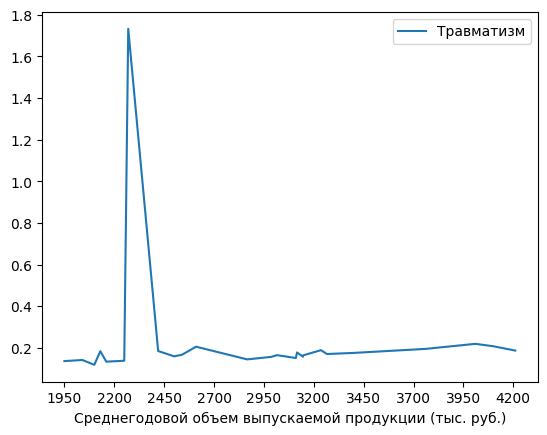

In [10]:
travm_df.plot(x='Среднегодовой объем выпускаемой продукции (тыс. руб.)', y='Травматизм', xticks=range(1950, 4200 + 1, 250))

# Блок 2

In [11]:
#1

# макетик в эхель табличке


In [12]:
#2

# тоже самое собсна

In [13]:
#3

df = pd.read_csv("data2.csv", index_col=0)
df

,Млн. руб.
Годы,
1,15317
2,22620
3,37593
4,42245
5,50789


<Axes: xlabel='Годы'>

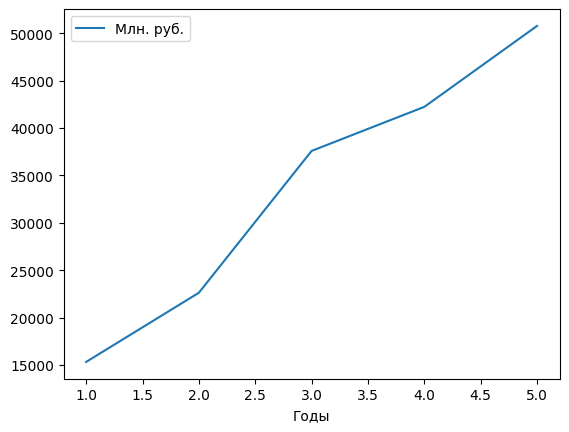

In [14]:
df.plot(kind='line')

<Axes: xlabel='Годы'>

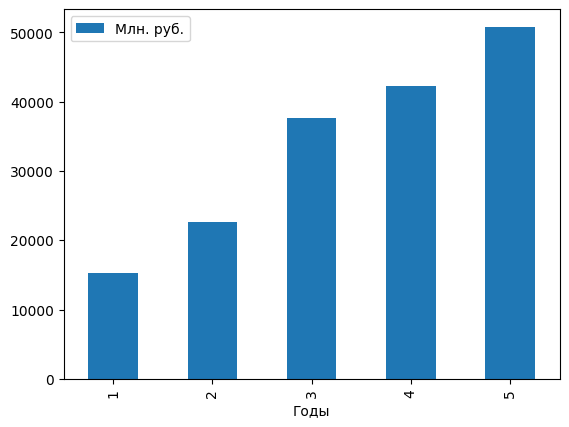

In [15]:
df.plot(kind='bar')

<Axes: ylabel='Годы'>

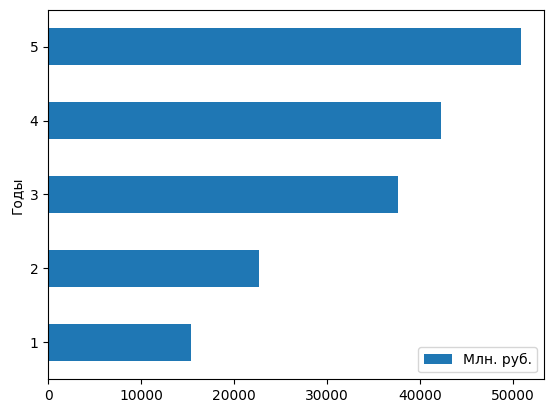

In [16]:
df.plot(kind='barh')

array([<Axes: ylabel='Млн. руб.'>], dtype=object)

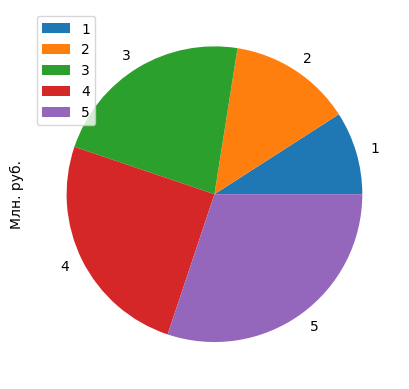

In [17]:
df.plot(kind='pie', subplots=True)

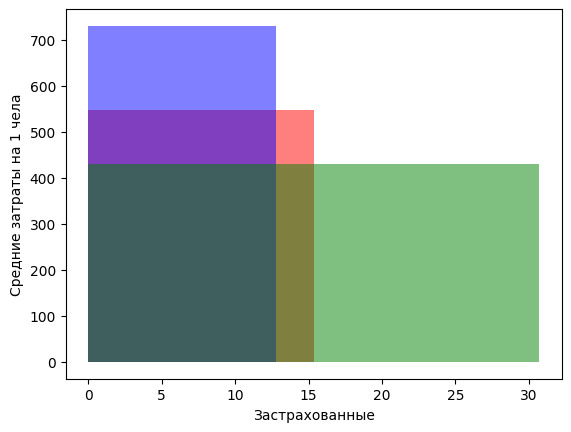

In [18]:
#4

poly1 = plt.Polygon([(0,0), (0, 547.3), (15.4, 547.3), (15.4, 0)], facecolor = "red", alpha=0.5)
poly2 = plt.Polygon([(0,0), (0, 730.8), (12.8, 730.8), (12.8, 0)], facecolor = "blue", alpha=0.5)
poly3 = plt.Polygon([(0,0), (0, 429.5), (30.7, 429.5), (30.7, 0)], facecolor = "green", alpha=0.5)

fig, ax = plt.subplots()
ax.add_patch(poly1)
ax.add_patch(poly2)
ax.add_patch(poly3)
ax.autoscale()
plt.xlabel("Застрахованные")
plt.ylabel("Средние затраты на 1 чела")
plt.show()

In [19]:
#5

# опять ехелька

# Блок 3

In [20]:
#1

r1 = [70, 73, 68, 75, 75]
r2 = [74 ,83, 81, 100, 73, 80]

sum(r1) / len(r1), sum(r2) / len(r2), (sum(r1) + sum(r2)) / (len(r1) + len(r2))

(72.2, 81.83333333333333, 77.45454545454545)

In [21]:
#2

a = (52.3 * 31.6 / 10000 + 66.4 * 25.8 / 10000 + 33.8 * 42.6 / 10000) * 100
str(a)+"%"


'48.0568%'

In [22]:
#3

a = ((0.008 * 125.9) + (0.012 * 154.3) + (0.005 * 200.8)) / (125.9 + 154.3 + 200.8) * 100
str(a)+"%"

'0.803076923076923%'

In [23]:
#4

lsd = [(1800+2000)/2, (2000+2200)/2, (2200+2400)/2, (2400+2600)/2, (2600+2800)/2, (2800+3000)/2, (3000+3200)/2]
dolya = [7.3, 10.4, 12.2, 25.5, 22.4, 14.6, 7.6]

S = 0
for i in range(len(lsd)):
    S += lsd[i] * dolya[i] / 100

S

2539.0

In [24]:
#5

((0.20 * 1100) + (0.30 * 1230) + (0.10 * 1150) + (0.40 * 1350)) / (220 / 1100 + 369 / 1230 + 115 / 1150 + 540 / 1350)

1244.0

# Блок 4

In [25]:
#1

Мода = "хорошо"

Данные = '5'*7 + '4'*18 + '3'*6 + '2'*2

Медиана = Данные[:len(Данные) // 2][len(Данные) // 2 - 1:]

In [26]:
#2

Мода = 6

Медиана = 6

In [27]:
#3

df = pd.read_csv('data3.csv', index_col=0)

mod_prom = df.loc[df['Промышленность'] == max(df['Промышленность'])].index[0]
mod_act = df.loc[df['Сфера услуг'] == max(df['Сфера услуг'])].index[0]
mod_med = df.loc[df['Медицина'] == max(df['Медицина'])].index[0]

print(mod_prom, mod_act, mod_med)

cdf = df.sort_values(by=['Промышленность'])
cdf['Промышленность'] = cdf['Промышленность'].cumsum()

mid_index = ((cdf.loc[mod_prom].loc['Промышленность'] + 1) / 2)

cdf = cdf.sort_values(by=['Промышленность'], ascending=False)

print(cdf.loc[(cdf['Промышленность'] >= mid_index)].sort_values(by=['Промышленность'], ascending=True).head(1).index[0])


cdf = df.sort_values(by=['Сфера услуг'])
cdf['Сфера услуг'] = cdf['Сфера услуг'].cumsum()

mid_index = ((cdf.loc[mod_act].loc['Сфера услуг'] + 1) / 2)

cdf = cdf.sort_values(by=['Сфера услуг'], ascending=False)

print(cdf.loc[(cdf['Сфера услуг'] >= mid_index)].sort_values(by=['Сфера услуг'], ascending=True).head(1).index[0])

cdf = df.sort_values(by=['Медицина'])
cdf['Медицина'] = cdf['Медицина'].cumsum()

mid_index = ((cdf.loc[mod_med].loc['Медицина'] + 1) / 2)

cdf = cdf.sort_values(by=['Медицина'], ascending=False)

print(cdf.loc[(cdf['Медицина'] >= mid_index)].sort_values(by=['Медицина'], ascending=True).head(1).index[0])

35-45 25-35 45-50
25-35
35-45
50-55


In [28]:
#4

df = pd.read_csv('data4.csv', index_col=0)

mod = df.loc[df['Число транспорта'] == max(df['Число транспорта'])]
mod_val = mod.index[0]

print(mod_val)

cdf = df.sort_values(by=['Число транспорта']).cumsum()
mid_index = (cdf.loc[mod_val]['Число транспорта'] + 1) / 2

print(mid_index)

cdf = cdf.sort_values(by=['Число транспорта'], ascending=False)
cdf.loc[(cdf['Число транспорта'] >= mid_index)].sort_values(by=['Число транспорта'], ascending=True).head(1).index[0]

14-16
50.5


'12-14'

# Блок 5

In [29]:
#1

возраст = [17, 18, 19, 20, 21]
студики = [10, 50, 70, 30, 10]
r = max(возраст) - min(возраст)

print(r)

x_среднее = sum(возраст)/len(возраст)

S = sum([abs(возраст[i] - x_среднее)*студики[i] for i in range(len(возраст))]) / 170

print(S)

S = sum([(возраст[i] - x_среднее)*(возраст[i] - x_среднее)*студики[i] for i in range(len(возраст))]) / 170

print(s := np.sqrt(S))

print(s / x_среднее * 100)

4
0.7058823529411765
0.9701425001453319
5.106013158659641


In [30]:
#2

xs = [50, 200, 400, 750, 2000, 4000]
ns = [50, 30, 10, 6, 3, 1, 100]

print(max(xs) - min(xs))

x_mid = sum(xs) / len(xs)

print( sum([abs(xs[i] - x_mid) * ns[i] for i in range(len(xs))])/sum(ns) )
print( s := sum([(xs[i] - x_mid)*(xs[i] - x_mid) * ns[i] for i in range(len(xs))])/sum(ns) )
print(np.sqrt(s) / x_mid * 100)

3950
532.3333333333333
599055.5555555555
62.75568590934043


In [31]:
#3

df = pd.read_csv('data5.csv')

en_df = df.loc[df['Тип оборудования'] == 'Энергетическое'].reset_index(drop=True)
mid_int = [0.3, 0.65, 0.75, 0.9]
en_df['Середина интервала'] = mid_int

prom_df = df.loc[df['Тип оборудования'] == 'Производственное'].reset_index(drop=True)
mid_int = [0.4, 0.825, 0.875, 0.95]
prom_df['Середина интервала'] = mid_int

def get_coef(adf):
    cdf = adf.copy()
    total_freq = sum(cdf['Число единиц оборудования'])
    cdf['Варианта (s)'] = cdf['Число единиц оборудования'] * cdf['Середина интервала']

    selective_mean = sum(cdf['Варианта (s)']) / total_freq
    
    cdf['Разность (d)'] = round(cdf['Середина интервала'] - selective_mean, 1)
    cdf['Частота (f)'] = abs(cdf['Разность (d)']) * cdf['Число единиц оборудования']
    cdf['Частота (2f)'] = (cdf['Разность (d)'] ** 2) * cdf['Число единиц оборудования']

    disp = sum(cdf['Частота (2f)']) / total_freq
    coef_var = np.sqrt(disp) / selective_mean * 100
    return coef_var

print(
get_coef(prom_df), get_coef(en_df))



29.716531516255394 16.98410667590002
